# Import all the necessary libraries

In [1]:
%matplotlib inline

import os
import glob
import json

import numpy as np
import pandas as pd
import cv2

import torch
import torch.nn
from torch.utils.data import TensorDataset, DataLoader

from matplotlib import pyplot as plt

In [2]:
json_file_path = 'batch_1/JSON/kaggle_data_1.json'

In [3]:
with open(json_file_path, 'r') as f:
    data = json.loads(f.read())


print(f'Number of jsons: {len(data)}')

Number of jsons: 10000


filename: 68691769-4d8d-498a-b1ad-62e8a8b3a07b.jpg
full latex: \lim_{h\to1^{+}}\frac{\frac{d}{dh}\left(3+-9\sec^{1}{h}\right)}{\frac{d}{dh}\left(\tan{h}+h\tan^{9}{h}\right)}
visible latex: \lim_h\to1+\frac\fracddh\left(3+-9\sec1h\right)\fracddh\left(\tanh+h\tan9h\right)
(483, 1764, 3)
Latex char: \lim_
xmin: 1, xmax: 195, ymin: 173, ymax: 302
Latex char: {
xmin: 6, xmax: 49, ymin: 324, ymax: 418
Latex char: h
xmin: 50, xmax: 93, ymin: 348, ymax: 392
Latex char: \to
xmin: 114, xmax: 147, ymin: 350, ymax: 402
Latex char: 1
xmin: 151, xmax: 190, ymin: 294, ymax: 330
Latex char: ^
xmin: 314, xmax: 1732, ymin: 234, ymax: 247
Latex char: {
xmin: 450, xmax: 584, ymin: 126, ymax: 132
Latex char: +
xmin: 501, xmax: 555, ymin: 53, ymax: 116
Latex char: }
xmin: 478, xmax: 527, ymin: 149, ymax: 214
Latex char: }
xmin: 538, xmax: 583, ymin: 138, ymax: 229
Latex char: \frac
xmin: 621, xmax: 683, ymin: 3, ymax: 176
Latex char: {
xmin: 696, xmax: 747, ymin: 88, ymax: 155
Latex char: \frac
xmin: 759, x

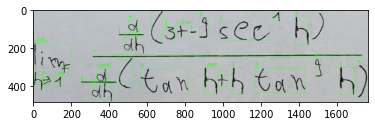

In [4]:
for d in data[3943:]: # 0-9999
    filename = d['filename']
    img_data = d['image_data']
    
    full_latex = img_data['full_latex_chars']
    visible_latex = img_data['visible_latex_chars']
    
    # Coordinates of each character
    xmins = img_data['xmins_raw']
    xmaxs = img_data['xmaxs_raw']
    ymins = img_data['ymins_raw']
    ymaxs = img_data['ymaxs_raw']

    print(f'filename: {filename}')
    print(f'full latex: {"".join(full_latex)}')
    print(f'visible latex: {"".join(visible_latex)}')

    img = cv2.imread(f'batch_1/background_images/{filename}')
    print(img.shape)
    
    for lt, xmin, xmax, ymin, ymax in zip(full_latex, xmins, xmaxs, ymins, ymaxs):
        print(f'Latex char: {lt}')
        print(f'xmin: {xmin}, xmax: {xmax}, ymin: {ymin}, ymax: {ymax}')
        img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (36, 255, 12), 1)
        cv2.putText(img, lt, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
    
    plt.imshow(img)
    plt.show()
    break

In [5]:
# Define our device (defaults to Apple Silicon)
device = 'cuda' if torch.cuda.is_available() else 'mps'

# Download the model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', autoshape=False, pretrained=False, device=device)

Using cache found in /Users/phoom/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-27 Python-3.8.13 torch-1.12.0 MPS


                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7            